# import libraries 

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# import  data 

In [5]:
data = pd.read_csv("C:/Users/Ahmed/Downloads/train.csv")
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
data.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
data.duplicated().sum()

0

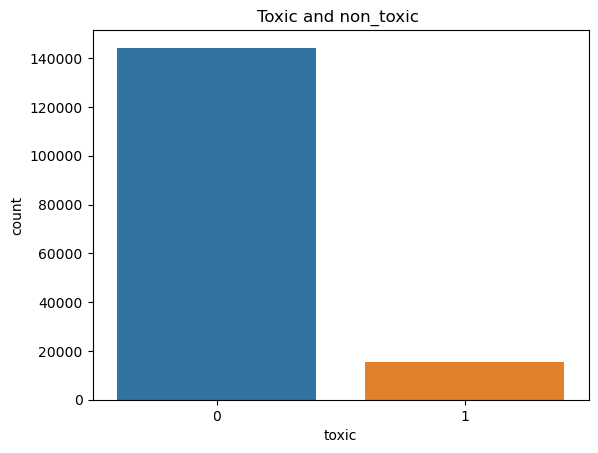

In [9]:
plt.title('Toxic and non_toxic ')
sns.countplot(x=data['toxic'])
plt.savefig('Toxic and non_toxic_Comment.png')

# text pre-processing

#### Take sample 

In [10]:
# text  = data['comment_text'][0]
# text

##### regulaeEX  (tokenizer)

In [11]:
import re 
# text = re.sub('[^a-zA-Z]'," ",text)
# text

## stop words in language 

In [12]:
import nltk
from nltk.corpus import stopwords


In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
# text = text.lower()
# text

In [15]:
# text = text.split()
# text

### lemmatizing

In [16]:
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()

In [17]:
# text = [Lemmatizer.lemmatize(word) for word in text]
# text

In [18]:
# temp = [word for word in text if word not in stopwords.words('english')]
# temp

In [19]:
# text = ' '.join(temp)
# text

In [20]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()

In [21]:
# cv.fit_transform(text.split()).toarray()

In [22]:
corpus = []
for comment in data['comment_text']:
    text = re.sub('[^a-zA-Z]'," ",str(comment).lower()) 
    text = ' '.join(
        Lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')
    )
    corpus.append(text)
corpus       

['explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired',
 'aww match background colour seemingly stuck thanks talk january utc',
 'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
 'make real suggestion improvement wondered section statistic later subsection type accident think reference may need tidying exact format ie date format etc later one else first preference formatting style reference want please let know appears backlog article review guess may delay reviewer turn listed relevant form eg wikipedia good article nomination transport',
 'sir hero chance remember page',
 'congratulation well use tool well talk',
 'cocksucker piss around work',
 'vandalism matt shirvington article reverted please banned',
 'sorry word nonsense offensive anyway intending write anything article wow would

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)

In [42]:
x = cv.fit_transform(corpus).astype('int32') 

In [43]:
x

<159571x10000 sparse matrix of type '<class 'numpy.int32'>'
	with 3845407 stored elements in Compressed Sparse Row format>

In [44]:
# joblib.dump(cv, 'CountVectorizer.pkl')

In [45]:
x.shape

(159571, 10000)

In [46]:
y = data['toxic']

# Build model

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [49]:
X_train.shape

(106912, 10000)

In [50]:
X_test.shape

(52659, 10000)

In [51]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [52]:
clf.fit(X_train,y_train) 

MultinomialNB()

# prediction

In [53]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
y_test.shape

(52659,)

# Evaluation 

In [55]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [56]:
print(confusion_matrix(y_test,y_pred))

[[46320  1256]
 [ 1429  3654]]


In [57]:
print(accuracy_score(y_test,y_pred))

0.9490115649746482


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     47576
           1       0.74      0.72      0.73      5083

    accuracy                           0.95     52659
   macro avg       0.86      0.85      0.85     52659
weighted avg       0.95      0.95      0.95     52659



# Model deployment 

In [59]:
import joblib

In [60]:
joblib.dump(clf,'Toxic_text.pkl')

['Toxic_text.pkl']

# load model

In [61]:
loaded = joblib.load('Toxic_text.pkl')

In [62]:
def predict_toxicity(input_text):
    # Preprocess the input text
    text = re.sub('[^a-zA-Z]', " ", input_text.lower())
    text = ' '.join(
        Lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')
    )
    
    # Transform the text using the CountVectorizer
    transformed_text = cv.transform([text])
    
    # Use the loaded model to predict
    prediction = loaded.predict(transformed_text)
    
    return prediction[0]

# Take user input
user_input = input("Enter a comment to check for toxicity: ")
result = predict_toxicity(user_input)

# Output the result
if result == 1:
    print(f"The comment is toxic : {result}")
else:
    print(f"The comment is not toxic : {result}")


Enter a comment to check for toxicity: fuck
The comment is toxic : 1


In [63]:
user_input = input("Enter a comment to check for toxicity: ")
result = predict_toxicity(user_input)


if result == 1:
    print(f"The comment is toxic : {result}")
else:
    print(f"The comment is not toxic : {result}")


Enter a comment to check for toxicity: hello
The comment is not toxic : 0
